In [1]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
import agent_class as agent

# Initialize environment and agent

In [3]:
env = gym.make('LunarLander-v2')
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [4]:
parameters = {'n_state':N_state, 'n_actions':N_actions}
my_agent = agent.dqn(parameters=parameters)

# Train agent

In [5]:
training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 40 episodes)  | (last 40 episodes) |
|-----------------------------------------------------------------------
|     100 |     -154.762    |       -544.429      |      -168.144      |
|     200 |      -97.640    |       -353.850      |      -118.232      |
|     300 |     -101.739    |       -304.919      |       -96.569      |
|     400 |      -59.344    |       -253.017      |       -64.263      |
|     500 |      -51.005    |        -77.179      |       -30.222      |
|     600 |      142.886    |       -204.343      |        19.663      |
|     700 |      -39.955    |       -225.182      |        73.666      |
|     800 |      222.021    |       -245.301      |       153.699      |
|     900 |      234.977    |        -88.766      |       181.106      |
|    1000 |      282.239    |       -255.875      |       219.330      |
|    1100 |      230.452    |          1.990      |

# Plot training stats

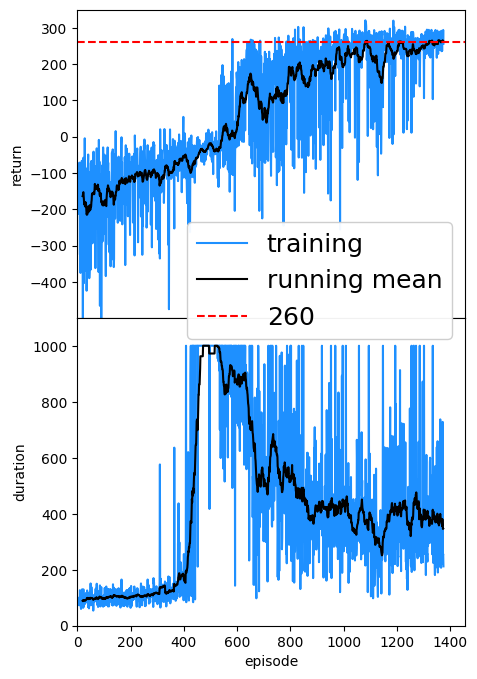

In [10]:
N = 20 

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    
    ax.plot(t,x,label='training',color='dodgerblue',)
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    ax.axhline(260,ls='--',
               label='260',
                        color='red')
    
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')

    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--',
                label='260', 
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [7]:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [11]:
env = PyGameWrapper(gym.make('LunarLander-v2',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

Run 1: duration = 201, total return = 263.804
Run 2: duration = 192, total return = 280.402
Run 3: duration = 213, total return = 261.146
Run 4: duration = 195, total return = 276.539
Run 5: duration = 1000, total return = 117.792
Run 6: duration = 199, total return = 264.463
Run 7: duration = 223, total return = 282.401
Run 8: duration = 196, total return = 282.845
Run 9: duration = 228, total return = 271.560
Run 10: duration = 222, total return = 259.091
Run 11: duration = 197, total return = 267.211
Run 12: duration = 188, total return = 252.054
Run 13: duration = 205, total return = 308.418
Run 14: duration = 205, total return = 305.615
Run 15: duration = 245, total return = 280.375
Run 16: duration = 188, total return = 268.873
Run 17: duration = 230, total return = 285.436
Run 18: duration = 253, total return = 297.521
Run 19: duration = 191, total return = 283.246
Run 20: duration = 212, total return = 268.913


We also create a video file containing 20 games played by the agent

In [9]:
from gymnasium.wrappers.monitoring import video_recorder

env = gym.make('LunarLander-v2', render_mode="rgb_array")
video = video_recorder.VideoRecorder(env, './video.mp4'.format())

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        video.capture_frame()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

video.close()
env.close()

Run 1: duration = 205, total return = 264.735
Run 2: duration = 229, total return = 283.584
Run 3: duration = 206, total return = 286.471
Run 4: duration = 183, total return = 303.792
Run 5: duration = 476, total return = 263.757
Run 6: duration = 226, total return = 283.492
Run 7: duration = 313, total return = 282.976
Run 8: duration = 202, total return = 260.486
Run 9: duration = 191, total return = 306.003
Run 10: duration = 193, total return = 302.999
Run 11: duration = 194, total return = 258.396
Run 12: duration = 1000, total return = 147.816
Run 13: duration = 199, total return = 247.652
Run 14: duration = 208, total return = 272.232
Run 15: duration = 205, total return = 284.310
Run 16: duration = 191, total return = 267.340
Run 17: duration = 271, total return = 251.489
Run 18: duration = 209, total return = 258.976
Run 19: duration = 259, total return = 305.450
Run 20: duration = 179, total return = 284.558
Moviepy - Building video ./video.mp4.
Moviepy - Writing video ./vide

Moviepy - Done !
Moviepy - video ready ./video.mp4
